# Simulating Moving Objects

Note that the first few sections are not run in the Jupyter notebook.  You can rund `asteroids.py` from the command line and view that file directly in a text editor.

## Digging deeper into Euler’s method

In [1]:
t = 0
s = (0,0)
v = (1,0)
a = (0,0.2)

In [2]:
dt = 2
steps = 5

In [3]:
from vectors import add, scale
positions = [s]
for _ in range(0,5):
    t += 2
    s = add(s, scale(dt,v)) 
    v = add(v, scale(dt,a)) 
    positions.append(s)

In [4]:
from draw2d import *
draw2d(Points2D(*positions))

<Figure size 600x500 with 1 Axes>

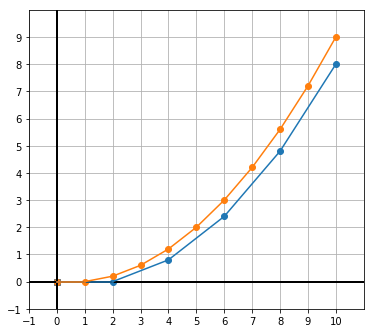

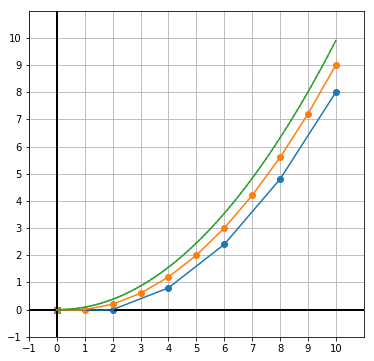

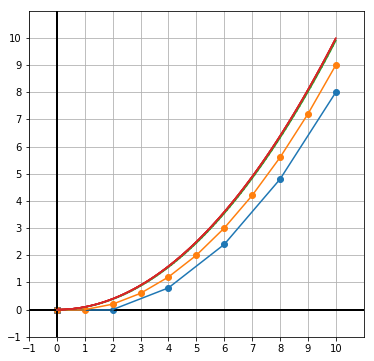

In [6]:
def pairs(lst):
    return list(zip(lst[:-1],lst[1:]))

def eulers_method(s0,v0,a,total_time,step_count):
    positions = [s0]
    s = s0
    v = v0
    dt = total_time/step_count
    for _ in range(0,step_count):
        s = add(s,scale(dt,v))
        v = add(v,scale(dt,a))
        positions.append(s)
    return positions

approx5 = eulers_method((0,0),(1,0),(0,0.2),10,5)
approx10 = eulers_method((0,0),(1,0),(0,0.2),10,10)
approx100 = eulers_method((0,0),(1,0),(0,0.2),10,100)
approx1000 = eulers_method((0,0),(1,0),(0,0.2),10,1000)

from draw2d import *
draw2d(
    Points2D(*approx5, color='C0'),
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx5)],
    Points2D(*approx10, color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(approx10)]
    )

from draw2d import *
draw2d(
    Points2D(*approx5, color='C0'),
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx5)],
    Points2D(*approx10, color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(approx10)],
    *[Segment2D(t,h,color='C2') for (h,t) in pairs(approx100)],
    save_as='../3eulers.svg'
    )

draw2d(
    Points2D(*approx5, color='C0'),
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx5)],
    Points2D(*approx10, color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(approx10)],
    *[Segment2D(t,h,color='C2') for (h,t) in pairs(approx100)],
    *[Segment2D(t,h,color='C3') for (h,t) in pairs(approx1000)],
    )
